In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
df = df.dropna()
df.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [4]:
df['sex'] = df['sex'].replace('.','FEMALE')
df['sex'].value_counts()

sex
MALE      168
FEMALE    166
Name: count, dtype: int64

###### Train | Test Split

In [5]:
X = pd.get_dummies(df.drop('species',axis=1),drop_first=True)
y = df['species']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=101)

###### Random Forest Classification

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [10]:
#help(RandomForestClassifier)

In [11]:
rf_model = RandomForestClassifier(n_estimators=10,max_features='sqrt',random_state=101)

In [12]:
rf_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

In [13]:
preds = rf_model.predict(X_test)
preds

array(['Chinstrap', 'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo',
       'Chinstrap', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Chinstrap', 'Gentoo', 'Adelie',
       'Chinstrap', 'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie', 'Adelie',
       'Chinstrap', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie',
       'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap', 'Chinstrap',
       'Chinstrap', 'Chinstrap', 'Chinstrap', 'Adelie', 'Adelie',
       'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap', 'Chinstrap',
       'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo', 'Adelie', 'Adelie',
       'Adelie', 'Gentoo', 'Chinstrap', 'Chinstrap', 'Gentoo', 'Gentoo',
       'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo',
       'Gentoo', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Gentoo', 'Adel

###### Evaluation

In [17]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [15]:
confusion_matrix(y_test,preds)

array([[40,  1,  0],
       [ 1, 22,  0],
       [ 0,  0, 37]])

In [16]:
rf_model.feature_importances_

array([3.46584088e-01, 1.20150588e-01, 2.39262547e-01, 1.48533620e-01,
       1.39253740e-01, 2.10550136e-05, 6.19436222e-03])

###### Choosing correct number of trees

In [18]:
test_errors = []

for n in range(1,40):
    model = RandomForestClassifier(n_estimators=n, max_features='sqrt')
    model.fit(X_train,y_train)
    test_preds = model.predict(X_test)
    test_errors.append(1-accuracy_score(test_preds,y_test))

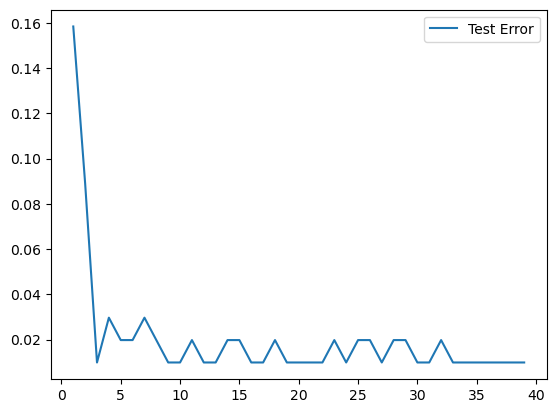

In [19]:
plt.plot(range(1,40), test_errors, label='Test Error')
plt.legend()
plt.show()